# 3D Hall Lab
Crk97

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integ
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.special as sf
#Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

## Import Data

In [3]:
df_1 = pd.read_csv(r'C:/Users/caden/Desktop/Hall Lab/3-28-data_trimmed.csv')
data1 = np.array(df_1)

df_2 = pd.read_csv(r'C:/Users/caden/Desktop/Hall Lab/3-30-data_p1_trimmed.csv')
data2 = np.array(df_2)

df_3 = pd.read_csv(r'C:/Users/caden/Desktop/Hall Lab/3-30-data_p2_trimmed.csv')
data3 = np.array(df_3)
#print(df_1)

16000

In [19]:
a = data1[2220:4440,1]
len(a)

2220

In [8]:
#data from 3-28
fig = plt.figure()
#figsize=[16,12]
ax_1 = fig.add_subplot(221)
ax_2 = fig.add_subplot(222)
ax_3 = fig.add_subplot(223)
ax_4 = fig.add_subplot(224)


ax_1.plot(data1[:2210,0],data1[:2210,1],'.')
ax_1.set_title('KDMM')
ax_1.set_ylim(0,.00155)

ax_2.plot(data1[2220:4430,0],data1[2220:4430,1],'.')
ax_2.set_title('Temp cunt')

ax_3.plot(data1[4440:6650,0],data1[4440:6650,1])
ax_3.set_title('Vert Volt')

ax_4.plot(data1[6660:8870,0],data1[6660:8870,1])
ax_4.set_title('Hall Volt (horz)')

fig.tight_layout()
plt.show()

In [72]:
temp = data1[2220:4430,1]
VL = data1[4440:6650,1]
VH = data1[6660:8870,1]
len(temp)

2210

In [97]:
plt.scatter(temp, VH)
plt.show()

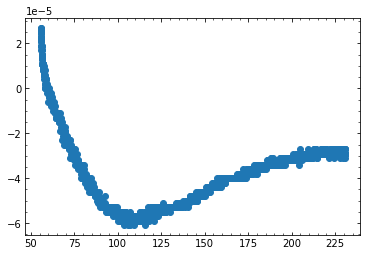

In [78]:
plt.scatter(temp[:1400], VH[:1400])
plt.show()

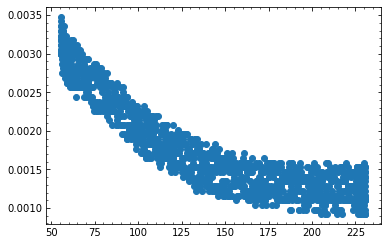

In [79]:
plt.scatter(temp[:1400], VL[:1400])
plt.show()

## Equations

charge carrier density, n, given by

$$ n = \frac{1}{qR_H}$$
where q is charge ($1.602 \times 10^{-19}~\mathrm{C}$) and $R_H$ is the Hall coefficient.

$$ R_H = \frac{V_Hd}{IB} $$

$$ \rho_{H} = BR_H $$

$$ \rho_{L} = \frac{V_LA}{IL} $$

$$ \sigma_{H} = Ce^{\frac{-E}{2k_BT}}$$

$$ \ln(\sigma_{H}) = \frac{-E}{2k_B}\frac{1}{T} + \ln(C)$$

$$\mu = \frac{R_H}{\rho_L}$$



## Import Data

In [81]:

RH = (VH*650e-6)/(2e-5*0.237)
plt.scatter(temp[50:temp.size-25], RH[50:RH.size-25])

In [22]:
n = 1/(1.602e-19*RH)

plt.scatter(temp[50:temp.size-25], n[50:n.size-25])

C:\Users\caden\AppData\Local\Temp/ipykernel_4088/2795870239.py:1: RuntimeWarning: divide by zero encountered in true_divide
  n = 1/(1.602e-19*RH)


In [28]:
rhoH = (0.237*RH)

plt.scatter(temp[50:temp.size-25], rhoH[50:rhoH.size-25])

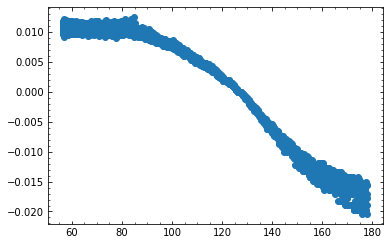

In [29]:
rhoL = (VL*5e-3)/(2e-5)

mu = RH/rhoL[:8070]

plt.scatter(temp[50:temp.size-25], mu[50:mu.size-25])

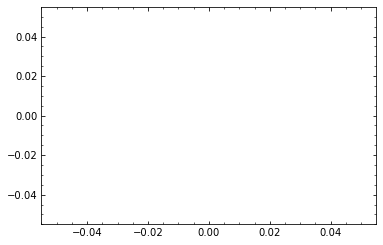

In [30]:
plt.scatter(temp[50:temp.size-7500],rhoL[50:rhoL.size-7500])

In [31]:
B = .237
Bunc = 0.003
I = 2e-5
Iunc = 1e-6

In [32]:
VHunc = VH*0.01
VLunc = VL*0.01

In [33]:
d = 650e-6
dunc = 10e-6
L = 5e-3
Lunc = 0.5e-3

In [34]:
RHunc = np.sqrt((VHunc*d/(I*B))**2+(VH*dunc/(I*B))**2+(VH*d*Iunc/(I**2*B))**2+(VH*d*Bunc/(I*B**2))**2)

In [35]:
rhoHunc = np.sqrt((Bunc*RH)**2+(B*RHunc)**2)

In [36]:
nunc = RHunc/(1.602e-19*RH**2)

C:\Users\caden\AppData\Local\Temp/ipykernel_4088/998610135.py:1: RuntimeWarning: invalid value encountered in true_divide
  nunc = RHunc/(1.602e-19*RH**2)


In [37]:
rhoLunc = np.sqrt((VLunc*L/I)**2+(VL*Lunc/I)**2+(VL*L*Iunc/I**2)**2)

In [38]:
muunc1 = (RHunc/rhoL[:8070])**2
muunc2 = (RH*rhoLunc[:8070]/rhoL[:8070]**2)**2
muunc = np.sqrt(muunc1+muunc2)

In [39]:
muunc

array([0.00141208, 0.00153587, 0.00156328, ..., 0.00192919, 0.00237411,
       0.00220463])

## Data from 3-30

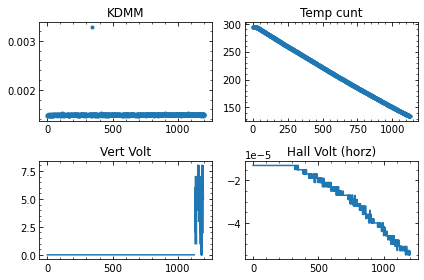

In [42]:
#data from 3-30
fig = plt.figure()
#figsize=[16,12]
ax_1 = fig.add_subplot(221)
ax_2 = fig.add_subplot(222)
ax_3 = fig.add_subplot(223)
ax_4 = fig.add_subplot(224)


ax_1.plot(data2[:1200,0],data2[:1200,1],'.')
ax_1.set_title('KDMM')
#ax_1.set_ylim(0,.00155)

ax_2.plot(data2[3000:4200,0],data2[3000:4200,1],'.')
ax_2.set_title('Temp cont')

ax_3.plot(data2[6000:7200,0],data2[6000:7200,1])
ax_3.set_title('Vert Volt')

ax_4.plot(data2[9000:10200,0],data2[9000:10200,1])
ax_4.set_title('Hall Volt (horz)')

fig.tight_layout()
plt.show()

In [50]:
VH

array([0., 0., 0., ..., 0., 0., 0.])

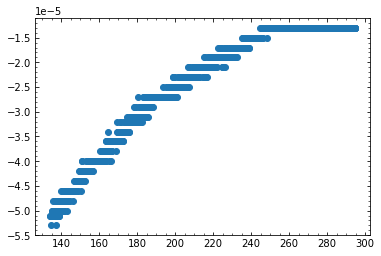

In [53]:
temp2 = data2[3000:4200,1]
#data2[3000:4200,1]
#VL = data2[8000:9200,1]
VH2 = data2[9000:10200,1]
#data2[9000:10200,1]
plt.scatter(temp2, VH2)
#plt.ylim(-.000001,.000001)
plt.show()

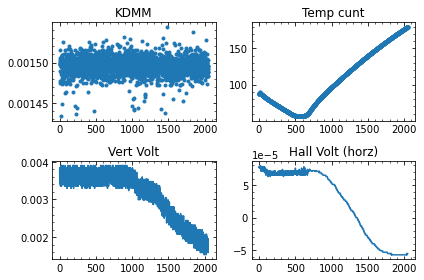

In [16]:
#data from 3-30 p2
fig = plt.figure()
#figsize=[16,12]
ax_1 = fig.add_subplot(221)
ax_2 = fig.add_subplot(222)
ax_3 = fig.add_subplot(223)
ax_4 = fig.add_subplot(224)


ax_1.plot(data3[:2050,0],data3[:2050,1],'.')
ax_1.set_title('KDMM')
#ax_1.set_ylim(0,.00155)

ax_2.plot(data3[4000:6050,0],data3[4000:6050,1],'.')
ax_2.set_title('Temp cunt')

ax_3.plot(data3[8000:10050,0],data3[8000:10050,1])
ax_3.set_title('Vert Volt')

ax_4.plot(data3[12000:14050,0],data3[12000:14050,1])
ax_4.set_title('Hall Volt (horz)')

fig.tight_layout()
plt.show()

2050

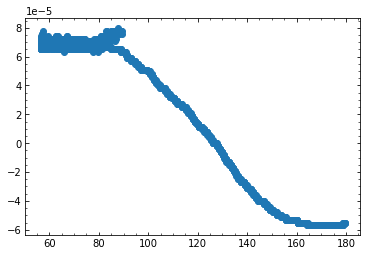

In [55]:
temp3 = data3[4000:6050,1]
VL3 = data3[8000:10050,1]
VH3 = data3[12000:14050,1]
plt.scatter(temp3, VH3)
plt.show()

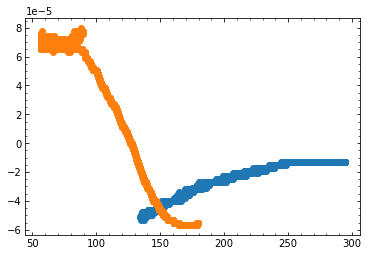

In [68]:
temp2 = data2[3000:4200,1]
VH2 = data2[9000:10200,1]
plt.scatter(temp2, VH2)
plt.scatter(temp3, VH3)
plt.show()

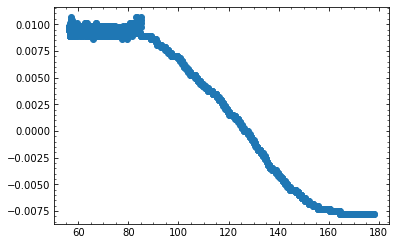

In [27]:

RH = (VH*650e-6)/(2e-5*0.237)
plt.scatter(temp[50:temp.size-25], RH[50:RH.size-25])